# Neuronowe architektury

@autor: Marcin Kostrzewa

In [28]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
%autoreload 2
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from src.utils import get_standarized_data, get_tsne_plot, plot_loss_and_metric

In [30]:
plt.style.use('rose-pine')

### Liniowa regresja jako punkt wyjścia

W przypadku liniowej regresji modelujemy zależność pewnego $Y$ od pewych $X_i$, $i=1,2,...,n$ jako:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n,$$

gdzie $\beta_i$ to współczynniki regresji.


Wszystko jest w porządku do czasu, gdy będziemy chcieli modelować $Y$ za pomocą bardziej złożonych (czytaj **nieliniowych**) zależności.

In [31]:
linear_data = np.load(os.path.join('data', 'linear.npz'))
linear_X, linear_y = linear_data['X'], linear_data['Y']

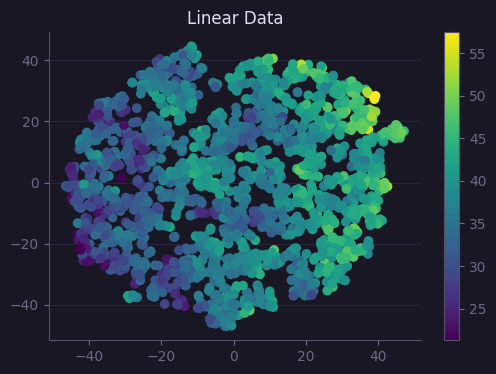

In [32]:
get_tsne_plot(linear_X, linear_y, 'Linear Data')

In [36]:
linear_X_train, linear_X_test, linear_y_train, linear_y_test = \
    train_test_split(linear_X, linear_y, test_size=0.2)

In [37]:
lr = LinearRegression()

lr.fit(linear_X_train, linear_y_train)
lr.score(linear_X_test, linear_y_test)

0.9926343736790604

In [38]:
nonlinear_data = np.load(os.path.join('data', 'nonlinear.npz'))
nonlinear_X, nonlinear_y = nonlinear_data['X'], nonlinear_data['Y']

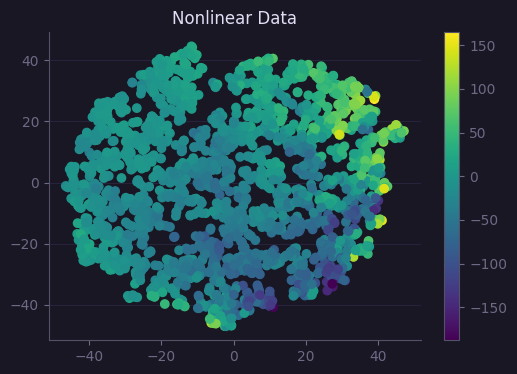

In [47]:
get_tsne_plot(nonlinear_X, nonlinear_y, 'Nonlinear relationship')

In [39]:
nl_X_train, nl_X_test, nl_y_train, nl_y_test = \
    train_test_split(nonlinear_X, nonlinear_y, test_size=0.2)

In [45]:
nl_X_train_scaled, nl_X_test_scaled = get_standarized_data(nl_X_train, nl_X_test)

In [46]:
lr.fit(nl_X_train_scaled, nl_y_train)
lr.score(nl_X_test_scaled, nl_y_test)

0.2936888997560083

In [66]:
from sklearn.metrics import mean_absolute_error

In [67]:
mean_absolute_error(lr.predict(nl_X_test_scaled), nl_y_test)

23.903355681729

No to sięgnijmy po sieć &hellip;

In [101]:
train_dataset = tf.data.Dataset.from_tensor_slices((nl_X_train_scaled, nl_y_train))
train_dataset = train_dataset.shuffle(324).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((nl_X_test_scaled, nl_y_test))
test_dataset = test_dataset.batch(32)

In [102]:
train_dataset.as_numpy_iterator().next()[0].shape

(32, 5)

In [108]:
nn_trial = Sequential()

nn_trial.add(Input(shape=(5, )))
nn_trial.add(Dense(200, activation='relu'))
nn_trial.add(Dense(200, activation='relu'))
nn_trial.add(Dense(1, activation='linear'))

nn_trial.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
nn_trial.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 200)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,601 (162.50 KB)

 Trainable params: 41,601 (162.50 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
nn_trial_hist = nn_trial.fit(train_dataset, epochs=500)

Epoch 1/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1678.2346 - mae: 30.8808
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1123.3969 - mae: 23.9644
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 774.2161 - mae: 18.5684
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 577.3321 - mae: 14.8053
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 449.3993 - mae: 12.4044
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 352.9284 - mae: 10.1749
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 379.6716 - mae: 10.3175
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 284.2920 - mae: 9.3269
Epoch 9/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 234.7571 - mae: 8.8938
Epoch 10/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 225.5680 - mae: 8.4538
Epoch 11/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 242.3361 - mae: 8.5303
Epoch 12/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 263.4503 - mae: 8.3069 
Epo

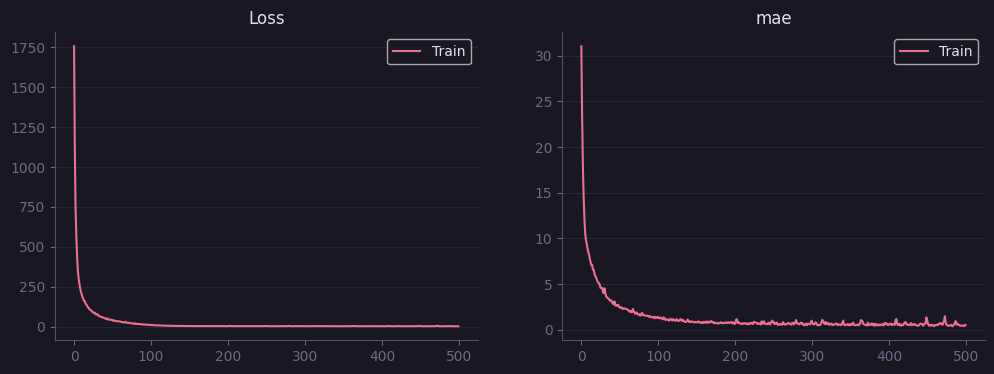

In [122]:
plot_loss_and_metric(nn_trial_hist, 'mae', val_present=False)

In [112]:
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor

In [113]:
hist_regr = HistGradientBoostingRegressor(n_iter_no_change=10, max_iter=1000)

hist_regr.fit(nl_X_train_scaled, nl_y_train)
mean_absolute_error(hist_regr.predict(nl_X_test_scaled), nl_y_test)

2.0559321146262004

In [115]:
rf_regr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

rf_regr.fit(nl_X_train_scaled, nl_y_train)
mean_absolute_error(rf_regr.predict(nl_X_test_scaled), nl_y_test)

2.026078986149968

### Deep learningowe frameworki

```mermaid
graph TB
    A[Frameworki] --> B[TensorFlow]
    A --> C[Keras/Tensorflow] 
    A --> P[Jax family]
    A --> D[PyTorch]
    A --> E[Theano] --- F[stare]
    A --> G[Chainer]
    A --> I[Caffe]
```

<!-- ok, but the names should be aligned horizontally - make correction to mermaid graph -->



### FFN i zabawa ilością neuronów

In [86]:
nasa_df = pd.read_csv(os.path.join('data', 'nasa.csv'))

In [87]:
nasa_df = (
    nasa_df.drop(['Close Approach Date', 'Orbiting Body', 
                  'Orbit Determination Date', 'Equinox',
                  'Neo Reference ID', 'Name'], axis=1)
)

In [90]:
nasa_df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,22,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,7,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,25,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


### CNN

### RNN, LSTM, GRU